In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

from sklearn.datasets import make_moons

from geomstats.geometry.special_orthogonal import SpecialOrthogonal

SO=SpecialOrthogonal(2)


INFO: Using numpy backend


In [2]:
def fixed_support_barycenter_update(X,Y_list):
    M_list = [ot.dist(X,Y) for Y in Y_list]
    T_list = [ot.emd(a,b,M) for M in M_list]

    return np.mean(np.array([Y_list[i].T@T_list[i].T@np.diag(1/a) for i in range(N)]),0).T

In [3]:
N =10#number of sample measures

m=100 #size of barycenter support
n=30 #size of each sample measures support

a=np.ones(m)/m #weights for barycenter
b=np.ones(n)/n #weights for sample measures

X = np.random.normal(size=(m,2))
Y_list = [(make_moons(n_samples=n, shuffle=True)[0]+10*np.random.rand(2)) for i in range(N)]
# Y_list = [(make_moons(n_samples=n, shuffle=True)[0]+10*np.random.rand(2))@SO.random_point() for i in range(N)]

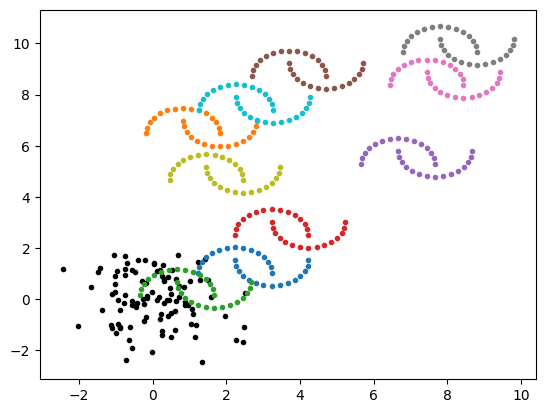

In [4]:
plt.plot(X[:,0],X[:,1],'.',c='black')

for Y in Y_list:
    plt.plot(Y[:,0],Y[:,1],'.')

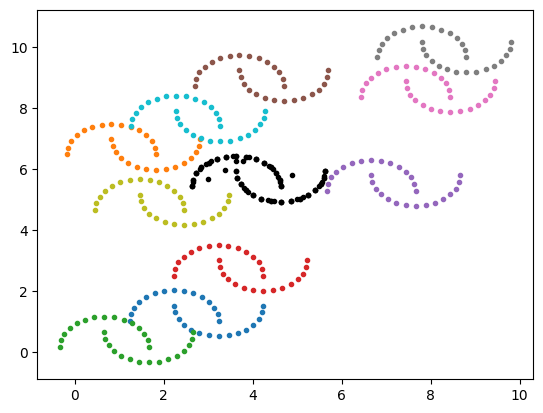

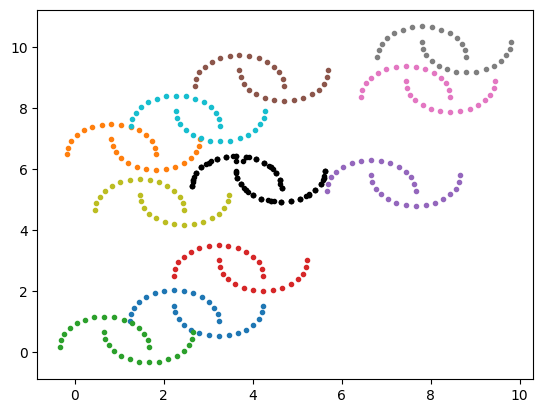

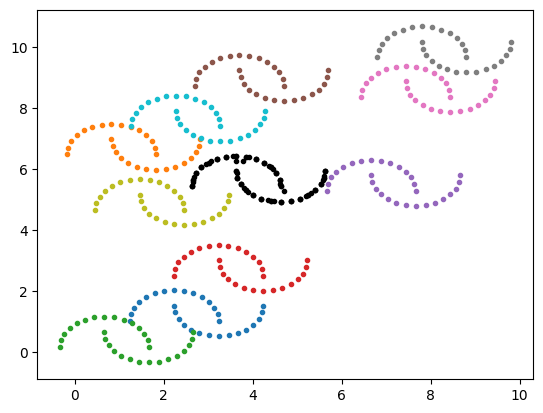

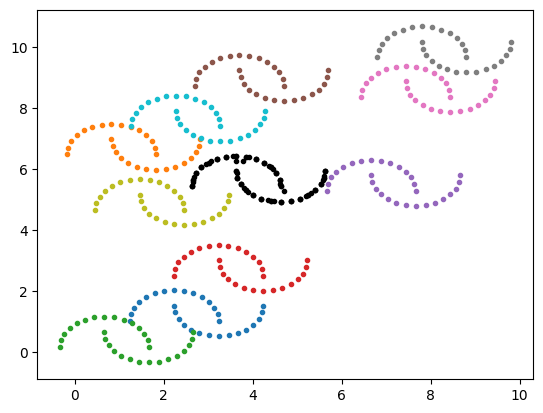

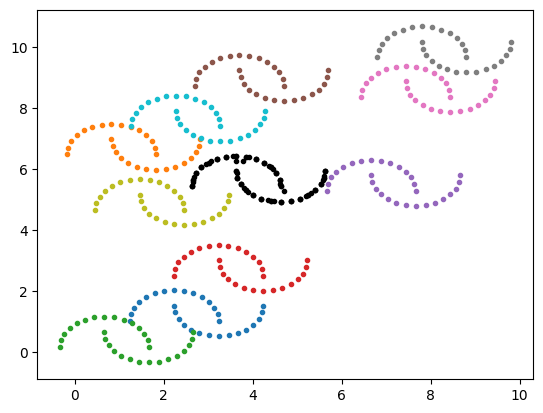

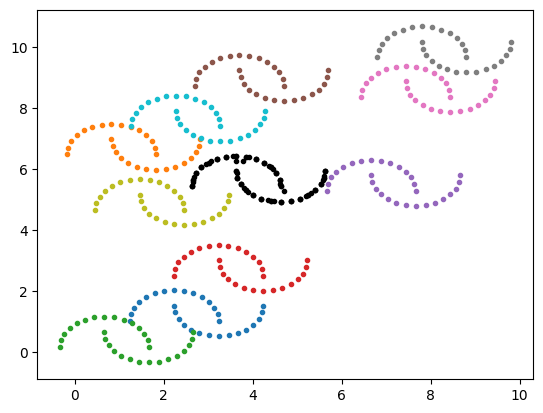

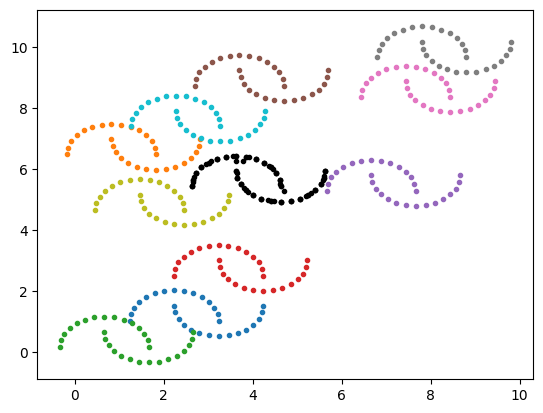

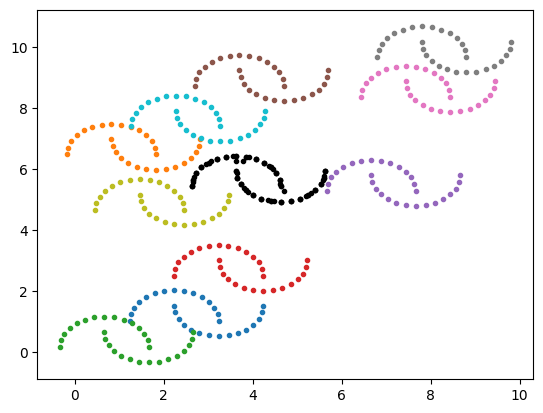

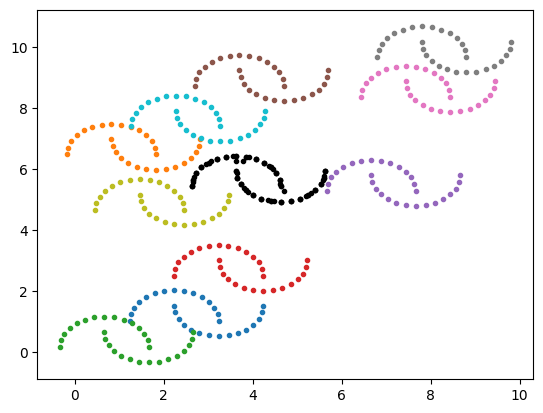

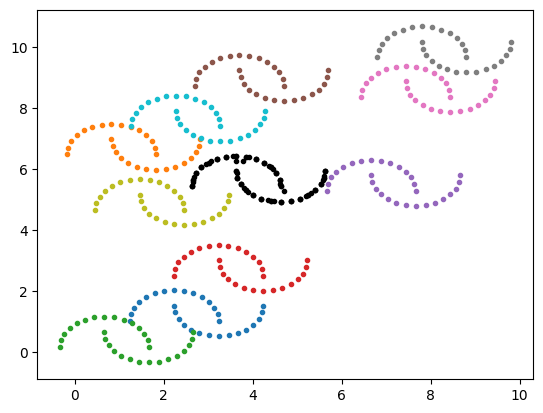

In [5]:
for i in range(10):
    
    X = fixed_support_barycenter_update(X,Y_list)

    for Y in Y_list:
        plt.plot(Y[:,0],Y[:,1],'.')

    plt.plot(X[:,0],X[:,1],'.',c='black')
    plt.show()